# STROKE PREDICTION - FINAL PROJECT

# Obed Immanuel Raj - 185002071

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

In [2]:
pd.set_option('display.max_columns', None)
def basicInfo(data):
    print(type(data))
    print("\nDimensions :", data.shape)
    print('\nNull Values:\n',data.isna().sum(),sep='')
    print('\nColumns: \n',data.columns,sep='')
    print('\n',data.info())
    
    

# Fetching data and getting basic info

In [3]:
data = pd.read_csv('stroke_data.csv')
basicInfo(data)

<class 'pandas.core.frame.DataFrame'>

Dimensions : (5110, 12)

Null Values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Columns: 
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 

'bmi' (numerical attribute) has 201 missing values

In [4]:
print("Head")
print(data.head())

Head
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [5]:
print("Description")
print(data.describe())

Description
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.

In [6]:
print(data['hypertension'].value_counts())
data['hypertension'] = data['hypertension'].astype('object')

0    4612
1     498
Name: hypertension, dtype: int64


In [7]:
print(data['heart_disease'].value_counts())
data['heart_disease'] = data['heart_disease'].astype('object')

0    4834
1     276
Name: heart_disease, dtype: int64


In [8]:
 data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

The data is skewed with only few stroke patients

# Stratified split on stroke status

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([4861.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         249.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

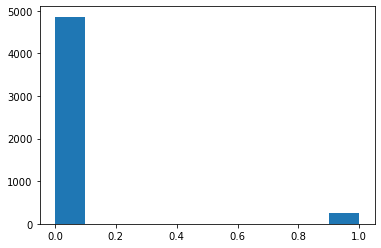

In [10]:
plt.hist(data['stroke'])

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['stroke']):
    strat_train = data.iloc[train_index]
    strat_test = data.iloc[test_index]

In [12]:
strat_test["stroke"].value_counts() / len(strat_test)

0    0.951076
1    0.048924
Name: stroke, dtype: float64

In [13]:
stroke = strat_train.copy()

# Visualisation

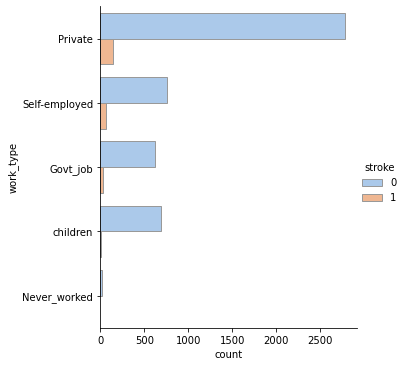

In [14]:
sns.catplot(y="work_type", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

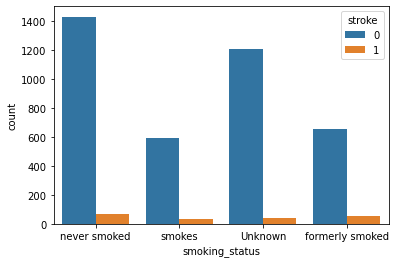

In [15]:
sns.countplot(x = stroke['smoking_status'], hue='stroke', data=stroke)

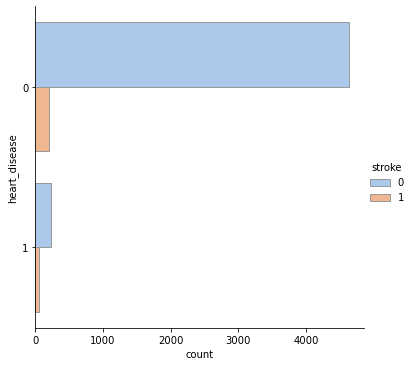

In [16]:
sns.catplot(y="heart_disease", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)

<AxesSubplot:>

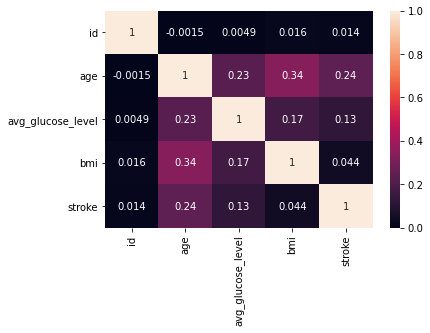

In [17]:
sns.heatmap(stroke.corr(), annot = True)

<AxesSubplot:>

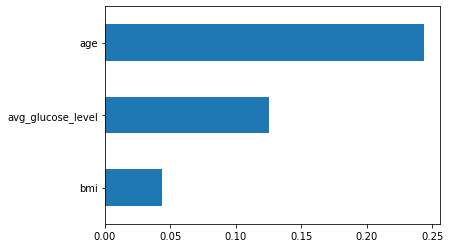

In [18]:
stroke.corr().stroke.sort_values()[1:-1].plot(kind='barh')

In [19]:
stroke.describe()

,id,age,avg_glucose_level,bmi,stroke
count,4088.000000,4088.000000,4088.000000,3918.000000,4088.000000
mean,36547.666585,43.353288,106.317167,28.922180,0.048679
std,21238.482961,22.596816,45.259652,7.928378,0.215223
min,77.000000,0.080000,55.120000,10.300000,0.000000
25%,17621.500000,26.000000,77.312500,23.600000,0.000000
50%,36963.500000,45.000000,91.945000,28.000000,0.000000
75%,54787.750000,61.000000,114.197500,33.100000,0.000000
max,72940.000000,82.000000,271.740000,97.600000,1.000000


## UnderSampling of majority class

In [20]:
df_0 = strat_train[strat_train['stroke']==0]
df_1 = strat_train[strat_train['stroke']==1]

In [21]:
df_0 = df_0.sample(1250 , random_state=42)

In [22]:
strat_train = pd.concat([df_0,df_1] , axis=0)

In [23]:
strat_train.reset_index(inplace=True)

In [24]:
strat_train.drop('index',axis=1,inplace=True)

# Pipeline to perform Encoding, Imputing & Scaling

In [25]:
X_train = strat_train.drop("stroke", axis=1)
y_train = strat_train["stroke"].copy()

X_test = strat_test.drop('stroke', axis=1)
y_test = strat_test['stroke'].copy()

In [26]:
num_attr = ['id', 'age', 'avg_glucose_level', 'bmi']
cat_attr = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin 
cat_col_names = []
class  extractCatCol(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.cat_enc = OneHotEncoder()
        return None
    def fit(self,X,y=None):
        self.cat_enc.fit(X[cat_attr])
        return self
    def transform(self,X):
        global cat_col_names
        cat_col_names =  list(self.cat_enc.get_feature_names())
        return self.cat_enc.transform(X[cat_attr])
cat_obj = extractCatCol()
cat_obj.fit_transform(X_train)
print(cat_col_names)


['x0_Female', 'x0_Male', 'x0_Other', 'x1_0', 'x1_1', 'x2_0', 'x2_1', 'x3_No', 'x3_Yes', 'x4_Govt_job', 'x4_Never_worked', 'x4_Private', 'x4_Self-employed', 'x4_children', 'x5_Rural', 'x5_Urban', 'x6_Unknown', 'x6_formerly smoked', 'x6_never smoked', 'x6_smokes']


In [29]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('std_scaler', StandardScaler())
])


from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attr),
    ('names',extractCatCol(),cat_attr)
])

In [30]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)
print(cat_col_names)

['x0_Female', 'x0_Male', 'x0_Other', 'x1_0', 'x1_1', 'x2_0', 'x2_1', 'x3_No', 'x3_Yes', 'x4_Govt_job', 'x4_Never_worked', 'x4_Private', 'x4_Self-employed', 'x4_children', 'x5_Rural', 'x5_Urban', 'x6_Unknown', 'x6_formerly smoked', 'x6_never smoked', 'x6_smokes']


Sample row after transformation

In [31]:
total_cols = num_attr+cat_col_names
for i in range(len(total_cols)):
    print ("{:<20} : {:<20} ".format(total_cols[i],X_test_prepared[0][i]))

id                   : -0.5930794441537198  
age                  : 0.7526796213834799   
avg_glucose_level    : -0.6392413139421999  
bmi                  : 0.7156240602297267   
x0_Female            : 0.0                  
x0_Male              : 1.0                  
x0_Other             : 0.0                  
x1_0                 : 1.0                  
x1_1                 : 0.0                  
x2_0                 : 1.0                  
x2_1                 : 0.0                  
x3_No                : 0.0                  
x3_Yes               : 1.0                  
x4_Govt_job          : 0.0                  
x4_Never_worked      : 0.0                  
x4_Private           : 1.0                  
x4_Self-employed     : 0.0                  
x4_children          : 0.0                  
x5_Rural             : 1.0                  
x5_Urban             : 0.0                  
x6_Unknown           : 0.0                  
x6_formerly smoked   : 0.0                  
x6_never s

# Feature selection

## Tree based Feature Selection

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
RandForest_Tree = RandomForestClassifier()  
# Fit the random forest with the original data
RandForest_Tree = RandForest_Tree.fit(X_train_prepared, y_train)
# Getting the relevance between features
relevants = RandForest_Tree.feature_importances_

In [33]:
# Apply the tree based on importance for the random forest classifier and indexing it
std = np.std([tree.feature_importances_ for tree in RandForest_Tree.estimators_], axis=0)
indices = np.argsort(relevants)[::-1]

In [34]:
# Printting the ranking of importance
print("Feature Rank:")

for i in range(X_train_prepared.shape[1]):
    print("%2d. Feature %s (%f)" 
          % (i + 1, total_cols[i], relevants[indices[i]]))

Feature Rank:
 1. Feature id (0.229325)
 2. Feature age (0.172320)
 3. Feature avg_glucose_level (0.159671)
 4. Feature bmi (0.147564)
 5. Feature x0_Female (0.019750)
 6. Feature x0_Male (0.019708)
 7. Feature x0_Other (0.018853)
 8. Feature x1_0 (0.018467)
 9. Feature x1_1 (0.018393)
10. Feature x2_0 (0.018344)
11. Feature x2_1 (0.018210)
12. Feature x3_No (0.018022)
13. Feature x3_Yes (0.017839)
14. Feature x4_Govt_job (0.017473)
15. Feature x4_Never_worked (0.016678)
16. Feature x4_Private (0.016468)
17. Feature x4_Self-employed (0.015350)
18. Feature x4_children (0.015212)
19. Feature x5_Rural (0.013622)
20. Feature x5_Urban (0.013298)
21. Feature x6_Unknown (0.013135)
22. Feature x6_formerly smoked (0.002247)
23. Feature x6_never smoked (0.000045)
24. Feature x6_smokes (0.000006)


In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_prepared, y_train)
# get importance
importance = dt_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %2d, Score: %.5f' % (i,v))

Feature:  0, Score: 0.15022
Feature:  1, Score: 0.26786
Feature:  2, Score: 0.21473
Feature:  3, Score: 0.17774
Feature:  4, Score: 0.00463
Feature:  5, Score: 0.02027
Feature:  6, Score: 0.00000
Feature:  7, Score: 0.01445
Feature:  8, Score: 0.01111
Feature:  9, Score: 0.01012
Feature: 10, Score: 0.01692
Feature: 11, Score: 0.02022
Feature: 12, Score: 0.00680
Feature: 13, Score: 0.00912
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00291
Feature: 16, Score: 0.01150
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.01505
Feature: 20, Score: 0.00596
Feature: 21, Score: 0.00774
Feature: 22, Score: 0.01914
Feature: 23, Score: 0.01352


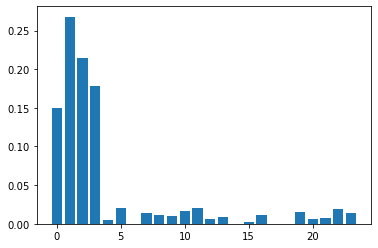

In [36]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Feature extraction

# Principal component analysis

In [37]:

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_prepared)

PCA()

Text(0, 0.5, 'Variance Ratio')

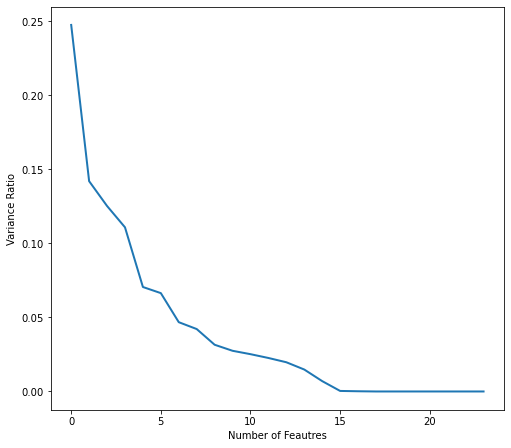

In [38]:
# Plotting to visualize the best number of elements
plt.figure(1, figsize=(9, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Feautres')
plt.ylabel('Variance Ratio')

## New X_train (removing features with <0.05% relevance)

In [39]:
unselected_ind = []
for i,v in enumerate(relevants):
    if(v < 0.0005):
        unselected_ind.append(i)
        

In [40]:
unselected_ind

[6, 14]

In [41]:
X_train_new = np.delete(X_train_prepared, unselected_ind, axis=1)
X_test_new = np.delete(X_test_prepared, unselected_ind, axis=1)

# Model Fitting

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

train_perfomance ={}
val_perfomance ={}

def display_scores(y, y_pred,model=None,is_train=None):
    #sns.heatmap(confusion_matrix(y, y_pred), annot=True)
    #plt.show()
    print("precision_score :", precision_score(y, y_pred))
    print("recall_score :", recall_score(y, y_pred))
    print("f1_score :", f1_score(y, y_pred))
    print("roc_auc_score :", roc_auc_score(y, y_pred))
    if(is_train):
        train_perfomance[model]=[f1_score(y,y_pred),roc_auc_score(y, y_pred)]
    else:
        val_perfomance[model]=[f1_score(y,y_pred),roc_auc_score(y, y_pred)]

In [43]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.legend()

In [44]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42, test_size = 0.2)
#     print(y_train[:50].sum())
#     print(y_train[:50].shape)
    train_errors, val_errors = [], []
    for m in range(250, len(X_train), 100):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(roc_auc_score(y_train[:m], y_train_predict))
        val_errors.append(roc_auc_score(y_val, y_val_predict))
    xi = list(range(len(X_train)))
    plt.plot(train_errors, 'r-+', linewidth = 1, label='train')
    plt.plot(val_errors, 'b-', linewidth = 2, label='Val')
    #plt.xticks(xi, X_train)
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("ROC AUC Score", fontsize=14)

In [45]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)

## LogisticRegression

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_new, y_train)

LogisticRegression(random_state=42)

In [47]:
#Prediction in Train set
y_log_pred = log_reg.predict(X_train_new)

display_scores(y_train, y_log_pred,'Logistic',True)

precision_score : 0.48936170212765956
recall_score : 0.11557788944723618
f1_score : 0.18699186991869918
roc_auc_score : 0.548188944723618


In [48]:
#Prediction in Cross-val set
y_val_log_pred = cross_val_predict(log_reg, X_train_prepared, y_train, cv=3)
display_scores(y_train, y_val_log_pred,'Logistic',False)

precision_score : 0.44
recall_score : 0.11055276381909548
f1_score : 0.17670682730923698
roc_auc_score : 0.5440763819095478


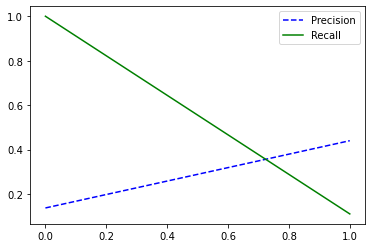

In [49]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_val_log_pred)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

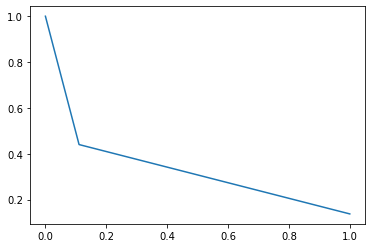

In [50]:
plt.plot(recalls, precisions)

Logistic Regression is severely underfitting for this data.

## SVM with Polynomial Kernal

In [51]:
from sklearn.svm import SVC

poly_kernal_svc = SVC(kernel='poly', degree=4, coef0=1, C=3,random_state=42)
poly_kernal_svc.fit(X_train_new, y_train)

SVC(C=3, coef0=1, degree=4, kernel='poly', random_state=42)

In [52]:
#Prediction in Train set
y_poly_ker_svm_pred = poly_kernal_svc.predict(X_train_new)
display_scores(y_train, y_poly_ker_svm_pred,'Poly_ker_SVM',True)

precision_score : 0.9568345323741008
recall_score : 0.6683417085427136
f1_score : 0.7869822485207102
roc_auc_score : 0.8317708542713569


In [53]:
#Prediction in Validation set
y_poly_ker_svm_pred_val = cross_val_predict(poly_kernal_svc, X_train_new, y_train, cv=3)
display_scores(y_train, y_poly_ker_svm_pred_val,'Poly_ker_SVM',False)

precision_score : 0.2983425414364641
recall_score : 0.271356783919598
f1_score : 0.2842105263157895
roc_auc_score : 0.584878391959799


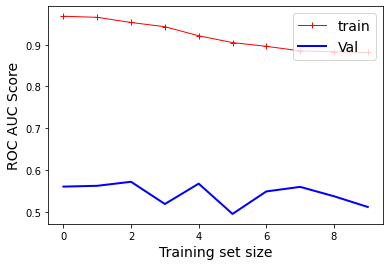

In [54]:
plot_learning_curves(poly_kernal_svc, X_train_new, y_train)

SVM with Polynomial Kernal is overfitting the data

## SVM with Gaussian RBF Kernel

In [55]:
from sklearn.svm import SVC

rbf_kernel_svc = SVC(kernel='rbf', gamma=0.12, C=16,random_state=42)
rbf_kernel_svc.fit(X_train_prepared, y_train)

SVC(C=16, gamma=0.12, random_state=42)

In [56]:
#Prediction in Train set
y_rbf_pred = rbf_kernel_svc.predict(X_train_prepared)
display_scores(y_train, y_rbf_pred,'rbf_kernel_svc',True)

precision_score : 0.9621212121212122
recall_score : 0.6381909547738693
f1_score : 0.7673716012084593
roc_auc_score : 0.8170954773869347


In [57]:
# Prediction in Validation set
y_rbf_pred_val = cross_val_predict(rbf_kernel_svc, X_train_new, y_train, cv=5)
display_scores(y_train, y_rbf_pred_val,'rbf_kernel_svc',False)

precision_score : 0.40625
recall_score : 0.2613065326633166
f1_score : 0.3180428134556575
roc_auc_score : 0.6002532663316583


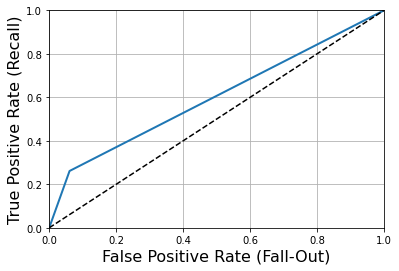

In [58]:
fpr, tpr, thresholds = roc_curve(y_train, y_rbf_pred_val)
plot_roc_curve(fpr, tpr)
plt.show()

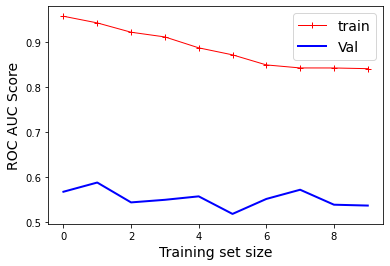

In [59]:
plot_learning_curves(rbf_kernel_svc, X_train_prepared, y_train)

SVM with Gaussian RBF Kernel is underfitting the data

## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf_clf = RandomForestClassifier(random_state=42, max_depth=1, min_samples_leaf = 1, min_samples_split=2, n_estimators=1)
rf_clf.fit(X_train_new, y_train)

RandomForestClassifier(max_depth=1, n_estimators=1, random_state=42)

In [62]:
#Prediction in Train set
y_rf_pred = rf_clf.predict(X_train_new)
display_scores(y_train, y_rf_pred,'Random_Forest',True)

precision_score : 0.0
recall_score : 0.0
f1_score : 0.0
roc_auc_score : 0.5


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# Prediction in Validation set
y_rf_pred_val = cross_val_predict(rf_clf, X_train_new, y_train, cv=5)
display_scores(y_train, y_rf_pred_val,'Random_Forest',False)

precision_score : 0.0
recall_score : 0.0
f1_score : 0.0
roc_auc_score : 0.5


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


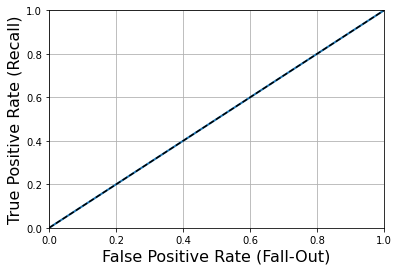

In [64]:
fpr, tpr, thresholds = roc_curve(y_train, y_rf_pred_val)
plot_roc_curve(fpr, tpr)
plt.show()

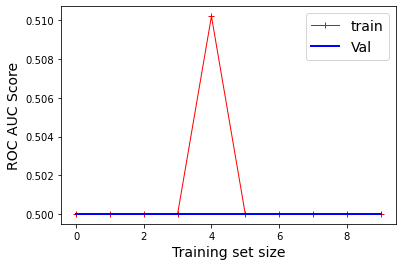

In [65]:
plot_learning_curves(rf_clf, X_train_prepared, y_train)

Random Forest does not predict even a single true positive. Hence the perfomance on both training and cross validation set is poor

## GradientBoostingClassifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(
    max_depth= 27, 
    min_samples_leaf= 11,
    min_samples_split= 700,
    random_state=42)
gb_clf.fit(X_train_new, y_train)

GradientBoostingClassifier(max_depth=27, min_samples_leaf=11,
                           min_samples_split=700, random_state=42)

In [67]:
#Prediction in Train set
y_gb_pred = gb_clf.predict(X_train_new)
display_scores(y_train, y_gb_pred,'Gradient Boosting',True)

precision_score : 0.9
recall_score : 0.40703517587939697
f1_score : 0.5605536332179931
roc_auc_score : 0.6999175879396984


In [68]:
# Prediction in Validation set
y_gb_pred_val = cross_val_predict(gb_clf, X_train_new, y_train, cv=5)
display_scores(y_train, y_gb_pred_val,'Gradient Boosting',False)

precision_score : 0.423728813559322
recall_score : 0.12562814070351758
f1_score : 0.19379844961240308
roc_auc_score : 0.5492140703517587


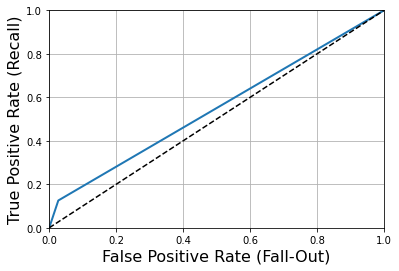

In [69]:
fpr, tpr, thresholds = roc_curve(y_train, y_gb_pred_val)
plot_roc_curve(fpr, tpr)
plt.show()

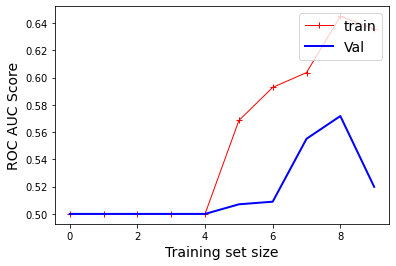

In [70]:
plot_learning_curves(gb_clf, X_train_new, y_train)

Although Gradient Boosting is overfitting the data, it does not give a good perfomance in training set

## BalancedBaggingClassifier

In [71]:
from imblearn.ensemble import BalancedBaggingClassifier
bb_clf = BalancedBaggingClassifier(
    max_samples= 0.6, 
    n_estimators= 64,
    random_state=42)
bb_clf.fit(X_train_new, y_train)

BalancedBaggingClassifier(max_samples=0.6, n_estimators=64, random_state=42)

In [72]:
#Prediction in Train set
y_bb_pred = bb_clf.predict(X_train_new)
display_scores(y_train, y_bb_pred,'Balanced_Bagging',True)

precision_score : 0.4136460554371002
recall_score : 0.9748743718592965
f1_score : 0.5808383233532933
roc_auc_score : 0.8774371859296483


In [73]:
# Prediction in Validation set
y_bb_pred_val = cross_val_predict(bb_clf, X_train_new, y_train, cv=5)
display_scores(y_train, y_bb_pred_val,'Balanced_Bagging',False)

precision_score : 0.3258655804480652
recall_score : 0.8040201005025126
f1_score : 0.46376811594202905
roc_auc_score : 0.7696100502512563


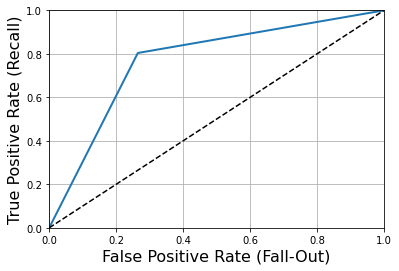

In [74]:
fpr, tpr, thresholds = roc_curve(y_train, y_bb_pred_val)
plot_roc_curve(fpr, tpr)
plt.show()

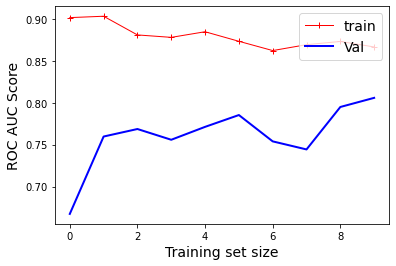

In [75]:
plot_learning_curves(bb_clf, X_train_new, y_train)

Balanced Bagging Classifier does well on training set and generalizes better than other algorithms.

In [76]:
# from sklearn.model_selection import GridSearchCV
# param_grid = [{
#     'n_estimators' : range(30,100)
#     'max_samples' : [0.4,0.5,0.6,0.7,0.8,0.9]
# }]

In [77]:
# grid_search = GridSearchCV(bb_clf, param_grid, cv=5, scoring='f1', return_train_score = True,verbose=3)

In [78]:
# grid_search.fit(X_train_prepared, y_train)

In [79]:
# grid_search.best_params_

## Random Forest With Class Weighting

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfw_clf = RandomForestClassifier(
    max_depth= 9,
 min_samples_leaf= 5,
 min_samples_split= 2,
 n_estimators= 14, 
 class_weight='balanced',random_state=42)
rfw_clf.fit(X_train_new, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=5,
                       n_estimators=14, random_state=42)

In [81]:
#Prediction in Train set
y_rfw_pred = rfw_clf.predict(X_train_new)
display_scores(y_train, y_rfw_pred,'Weighted_Random_Forest',True)

precision_score : 0.4931506849315068
recall_score : 0.9045226130653267
f1_score : 0.6382978723404255
roc_auc_score : 0.8782613065326632


In [82]:
# Prediction in Validation set
y_rfw_pred_val = cross_val_predict(rfw_clf, X_train_new, y_train, cv=5)
display_scores(y_train, y_rfw_pred_val,'Weighted_Random_Forest',False)

precision_score : 0.323943661971831
recall_score : 0.5778894472361809
f1_score : 0.4151624548736462
roc_auc_score : 0.6929447236180906


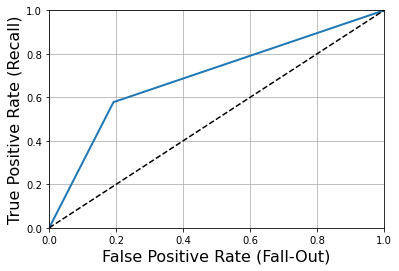

In [83]:
fpr, tpr, thresholds = roc_curve(y_train, y_rfw_pred_val)
plot_roc_curve(fpr, tpr)
plt.show()

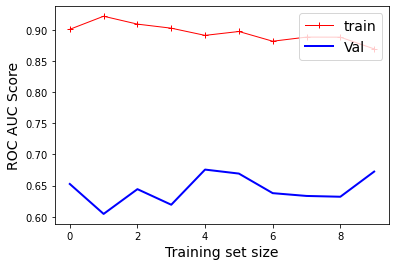

In [84]:
plot_learning_curves(rfw_clf, X_train_prepared, y_train)

Although, Random Forest With Class Weighting performs better than Random Forest, it ovefits the data

In [85]:
# from sklearn.model_selection import GridSearchCV
# param_grid = [{
#     'max_depth' : range(4,10),
#     'min_samples_leaf': [4,5,6,7],
#     'n_estimators' : range(5,15)
# }]

In [86]:
# grid_search = GridSearchCV(rfw_clf, param_grid, cv=5, scoring='f1', return_train_score = True,verbose=3)

In [87]:
# grid_search.fit(X_train_prepared, y_train)

In [88]:
# grid_search.best_params_

## BalancedRandomForestClassifier

Using BalancedRandomForestClassifier for X_train_new

In [89]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf_clf = BalancedRandomForestClassifier(
    max_depth=11,
 n_estimators= 21,
 max_samples=0.2505050505050505,
    random_state=42)
brf_clf.fit(X_train_new, y_train)

BalancedRandomForestClassifier(max_depth=11, max_samples=0.2505050505050505,
                               n_estimators=21, random_state=42)

In [90]:
#Prediction in Train set
y_brf_pred = brf_clf.predict(X_train_new)
display_scores(y_train, y_brf_pred,'Balanced_Random_Forest',True)

precision_score : 0.35804701627486435
recall_score : 0.9949748743718593
f1_score : 0.526595744680851
roc_auc_score : 0.8554874371859296


In [91]:
# Prediction in Validation set
y_brf_pred_val = cross_val_predict(brf_clf, X_train_new, y_train, cv=5)
display_scores(y_train, y_brf_pred_val,'Balanced_Random_Forest',False)

precision_score : 0.3006993006993007
recall_score : 0.864321608040201
f1_score : 0.4461738002594034
roc_auc_score : 0.7721608040201005


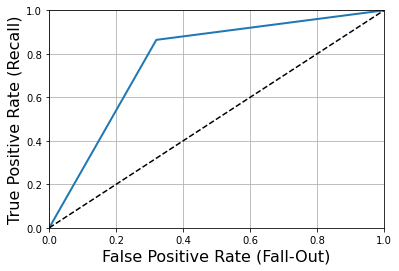

In [92]:
fpr, tpr, thresholds = roc_curve(y_train, y_brf_pred_val)
plot_roc_curve(fpr, tpr)
plt.show()

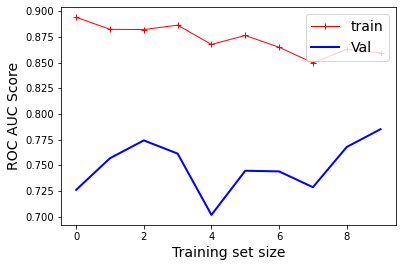

In [93]:
plot_learning_curves(brf_clf, X_train_new, y_train)

Balanced RandomForest Classifier performs well on training data and generalizes better than Random Forest With Class Weighting. But it does not beat Balanced Bagging Classifier

In [94]:
# from sklearn.model_selection import GridSearchCV
# param_grid = [{
#     'max_depth' : range(10,11,12),
#     'n_estimators' : range(21,22,23),
#     'max_samples': np.linspace(0.2,0.4,100),
# }]

In [95]:
# grid_search = GridSearchCV(brf_clf, param_grid, cv=5, scoring='f1', return_train_score = True,verbose=3)

In [96]:
# grid_search.fit(X_train_prepared, y_train)

In [97]:
# grid_search.best_params_

## Easy Ensemble

In [98]:
from imblearn.ensemble import EasyEnsembleClassifier
ee_clf = EasyEnsembleClassifier(n_estimators=10)
ee_clf.fit(X_train_new, y_train)

EasyEnsembleClassifier()

In [99]:
#Prediction in Train set
y_ee_pred = ee_clf.predict(X_train_new)
display_scores(y_train, y_ee_pred,'Easy Ensemble',True)

precision_score : 0.31333333333333335
recall_score : 0.9447236180904522
f1_score : 0.4705882352941177
roc_auc_score : 0.8075618090452261


In [100]:
# Prediction in Validation set
y_ee_pred_val = cross_val_predict(ee_clf, X_train_new, y_train, cv=5)
display_scores(y_train, y_ee_pred_val,'Easy Ensemble',False)

precision_score : 0.272419627749577
recall_score : 0.8090452261306532
f1_score : 0.40759493670886077
roc_auc_score : 0.7325226130653266


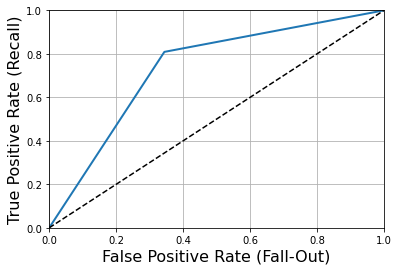

In [101]:
fpr, tpr, thresholds = roc_curve(y_train, y_ee_pred_val)
plot_roc_curve(fpr, tpr)
plt.show()

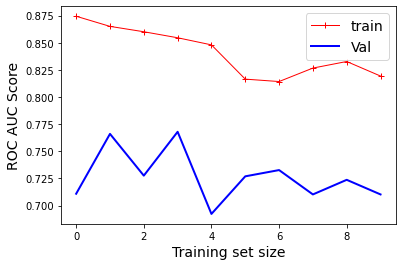

In [102]:
plot_learning_curves(ee_clf, X_train_new, y_train)

Easy Ensemble algorithm performs comparatively well on both training and cross validation.

### Perfomance on training set

In [103]:
print ("{:<25} {:<20} {:<20}".format('NAME', 'F1', 'ROC_AUC'))
  
# print each data item.
for key, value in train_perfomance.items():
    f1, roc_auc = value
    print ("{:<25} {:<20} {:<20}".format(key, f1, roc_auc))

NAME                      F1                   ROC_AUC             
Logistic                  0.18699186991869918  0.548188944723618   
Poly_ker_SVM              0.7869822485207102   0.8317708542713569  
rbf_kernel_svc            0.7673716012084593   0.8170954773869347  
Random_Forest             0.0                  0.5                 
Gradient Boosting         0.5605536332179931   0.6999175879396984  
Balanced_Bagging          0.5808383233532933   0.8774371859296483  
Weighted_Random_Forest    0.6382978723404255   0.8782613065326632  
Balanced_Random_Forest    0.526595744680851    0.8554874371859296  
Easy Ensemble             0.4705882352941177   0.8075618090452261  


### Perfomance on cross_validation set

In [104]:
print ("{:<25} {:<20} {:<20}".format('NAME', 'F1', 'ROC_AUC'))
  
# print each data item.
for key, value in val_perfomance.items():
    f1, roc_auc = value
    print ("{:<25} {:<20} {:<20}".format(key, f1, roc_auc))

NAME                      F1                   ROC_AUC             
Logistic                  0.17670682730923698  0.5440763819095478  
Poly_ker_SVM              0.2842105263157895   0.584878391959799   
rbf_kernel_svc            0.3180428134556575   0.6002532663316583  
Random_Forest             0.0                  0.5                 
Gradient Boosting         0.19379844961240308  0.5492140703517587  
Balanced_Bagging          0.46376811594202905  0.7696100502512563  
Weighted_Random_Forest    0.4151624548736462   0.6929447236180906  
Balanced_Random_Forest    0.4461738002594034   0.7721608040201005  
Easy Ensemble             0.40759493670886077  0.7325226130653266  


Balanced Bagging Classifier has better scored in both training cross-validation. Hence this model is selected.

## Testing

In [105]:
final_predictions = bb_clf.predict(X_test_new)
display_scores(y_test, final_predictions)

precision_score : 0.13804713804713806
recall_score : 0.82
f1_score : 0.23631123919308358
roc_auc_score : 0.7783127572016459


Bagging is an ensemble algorithm that fits multiple models on different subsets of a training dataset, then combines the predictions from all models.

Although effective, they are not suited to classification problems with a skewed class distribution.

There are many ways to adapt bagging for use with imbalanced classification.

The imbalanced-learn library provides a version of bagging that uses a random undersampling strategy on the majority class within a bootstrap sample in order to balance the two classes. This is provided in the BalancedBaggingClassifier class.


AS this data is extremely skewed, only either high recall or high precision can be obtained, but not both. Hence high 'f1 score' cannot be expected.